# Ejemplo de Bolsa de Palabras (Bag of Words) en Procesamiento de Lenguaje Natural

# 1. Instalación e Importación de Librerías

Usaremos la librería scikit-learn, en particular el módulo CountVectorizer, que se encarga de convertir una colección de documentos de texto en una matriz de tokens contados.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

# Explicación:

    CountVectorizer es una herramienta que transforma el texto en una matriz de conteo de palabras.

    pandas se usará para visualizar de forma tabular la matriz resultante.

# 2. Preparación de los Datos

Crearemos una lista de documentos de ejemplo. Cada documento es simplemente una cadena de texto.

In [7]:
# Corpus de ejemplo: un conjunto de documentos (oraciones)

In [8]:
documentos = [
    "El gato negro duerme en el sofá",
    "El perro juega en el jardín",
    "El gato y el perro son animales",
    "Me gusta el sofá y el jardín"
]

# Explicación:
Cada cadena representa un documento. El BoW se basará en contar cuántas veces aparece cada palabra en cada documento.

# 3. Creación del Modelo Bolsa de Palabras

Utilizaremos CountVectorizer para transformar los documentos en una matriz numérica. 

In [9]:
# Crear el objeto vectorizador de Bolsa de Palabras

In [10]:
vectorizador = CountVectorizer() # intanciamos el objeto

In [11]:
# Transformar los documentos a una matriz de conteo de palabras

In [12]:
matriz_bow = vectorizador.fit_transform(documentos)

# Explicación:

    El método fit_transform ajusta el modelo al vocabulario encontrado en los documentos y luego transforma el texto en una matriz dispersa donde cada fila corresponde a un documento y cada columna a una palabra del vocabulario.

    La matriz resultante tiene dimensiones [n_documentos x n_palabras].

# 4. Visualización de la Matriz de Bolsa de Palabras

Podemos obtener el vocabulario y convertir la matriz dispersa a un DataFrame de pandas para visualizar mejor los datos.

In [13]:
# Obtener el vocabulario (extraer todas las palabras únicas)

In [14]:
vocabulario = vectorizador.get_feature_names_out()

In [15]:
# Convertir la matriz dispersa a una matriz densa para visualización

In [16]:
matriz_bow_densa = matriz_bow.toarray()

In [17]:
# Crear un DataFrame para mostrar los resultados de manera clara

In [18]:
df_bow = pd.DataFrame(
    matriz_bow_densa, 
    columns=vocabulario, 
    index=[f'Documento {i+1}' for i in range(len(documentos))]
)

# Explicación:

    get_feature_names_out() devuelve una lista con todas las palabras (tokens) encontradas.

    X.toarray() convierte la matriz dispersa a una matriz densa (array) para facilitar su visualización.

    El DataFrame resultante muestra cuántas veces aparece cada palabra en cada documento.

In [19]:
# 1. Heatmap de la Bolsa de Palabras

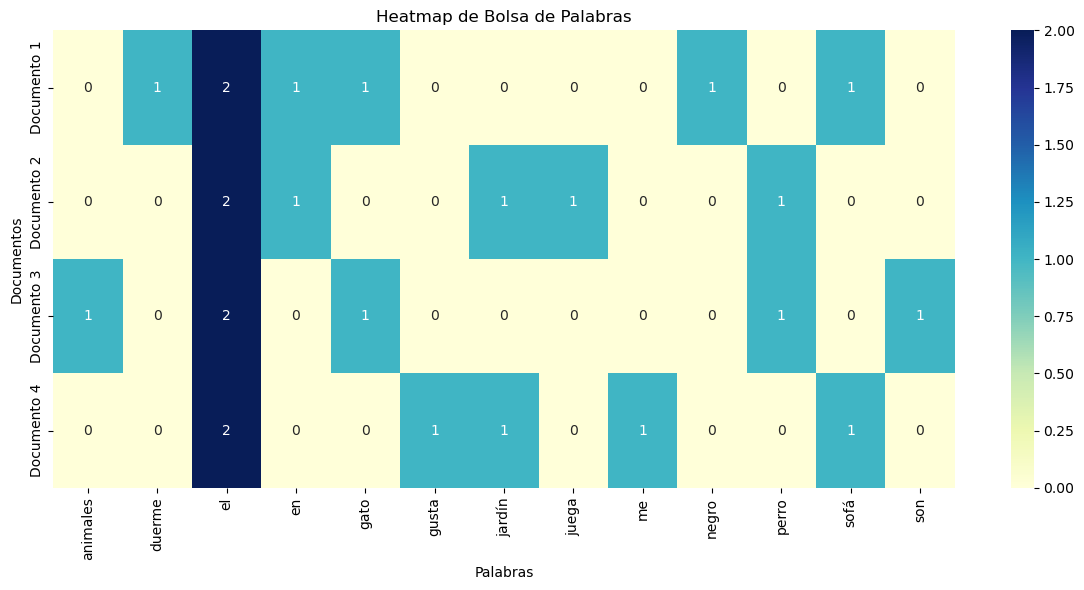

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_bow, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap de Bolsa de Palabras')
plt.xlabel('Palabras')
plt.ylabel('Documentos')
plt.tight_layout()
plt.show()

In [21]:
# Sumar las apariciones de cada palabra en todos los documentos

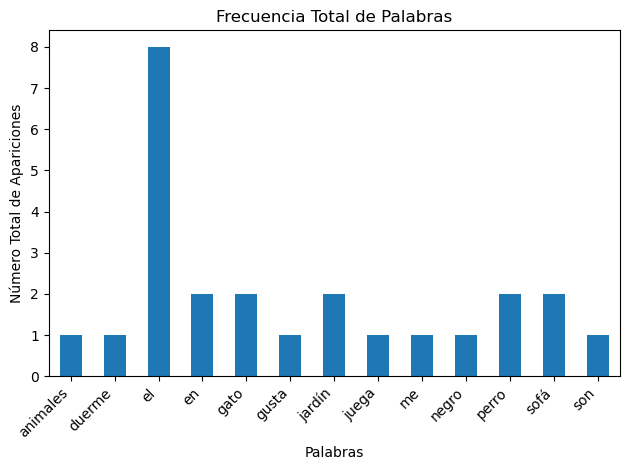

In [22]:
conteo_palabras = df_bow.sum()
conteo_palabras.plot(kind='bar')
plt.title('Frecuencia Total de Palabras')
plt.xlabel('Palabras')
plt.ylabel('Número Total de Apariciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Información adicional de frecuencia

In [24]:
print("Frecuencia total de palabras:")
print(conteo_palabras)

Frecuencia total de palabras:
animales    1
duerme      1
el          8
en          2
gato        2
gusta       1
jardín      2
juega       1
me          1
negro       1
perro       2
sofá        2
son         1
dtype: int64


In [25]:
# Imprimir los documentos originales

In [26]:
print("Documentos originales:")
for i, doc in enumerate(documentos, 1):
    print(f"Documento {i}: {doc}")

Documentos originales:
Documento 1: El gato negro duerme en el sofá
Documento 2: El perro juega en el jardín
Documento 3: El gato y el perro son animales
Documento 4: Me gusta el sofá y el jardín


In [27]:
print("\nVocabulario (Palabras únicas):")
print(vocabulario)


Vocabulario (Palabras únicas):
['animales' 'duerme' 'el' 'en' 'gato' 'gusta' 'jardín' 'juega' 'me'
 'negro' 'perro' 'sofá' 'son']


In [48]:
print("\nMatriz de Bolsa de Palabras:")
print(df_bow)


Matriz de Bolsa de Palabras:
             animales  duerme  el  en  gato  gusta  jardín  juega  me  negro  \
Documento 1         0       1   2   1     1      0       0      0   0      1   
Documento 2         0       0   2   1     0      0       1      1   0      0   
Documento 3         1       0   2   0     1      0       0      0   0      0   
Documento 4         0       0   2   0     0      1       1      0   1      0   

             perro  sofá  son  
Documento 1      0     1    0  
Documento 2      1     0    0  
Documento 3      1     0    1  
Documento 4      0     1    0  


In [49]:
# Ejemplo de cómo se usa BoW para clasificación de texto

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [51]:
# Datos de ejemplo para clasificación

In [52]:
X = matriz_bow
y = np.array(['diez', 'veinte', 'treinta', 'cuarenta'])

In [53]:
# Dividir los datos en entrenamiento y prueba

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
# Entrenar un clasificador Naive Bayes

In [56]:
clasificador = MultinomialNB()
clasificador.fit(X_train, y_train)

MultinomialNB()

In [57]:
# Predecir la clase de un nuevo documento

In [58]:
nuevo_documento = ["El gato está en el techo alto"]
nuevo_documento_bow = vectorizador.transform(nuevo_documento)
prediccion = clasificador.predict(nuevo_documento_bow)

In [59]:
print("\nClasificación de nuevo documento:")
print(f"Documento: {nuevo_documento[0]}")
print(f"Clase predicha: {prediccion[0]}")


Clasificación de nuevo documento:
Documento: El gato está en el techo alto
Clase predicha: diez
